In [17]:
import numpy as np 
import pandas as pd
from scipy.stats import zscore
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
pd.set_option('display.max_rows', None) 
pd.set_option('display.max_columns', None) 

# 1 Pre-process for modeling

## 1.1 Process with data frame

In [18]:
#import data
df= pd.read_csv('./processedListingDATA(4 seasons).csv')
df.head()

,id,availability in one year,name,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,price,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,bathroom_count,bathroom_type,Total crime
0,6606,273,"Fab, private seattle urban cottage!",Wallingford,47.65444,-122.33629,Entire guesthouse,Entire home/apt,1,1 bath,1.0,1.0,99.0,159,4.61,4.67,4.67,4.83,4.76,4.88,4.57,1.0,standard,19411.0
1,9419,336,Glorious sun room w/ memory foambed,Georgetown,47.55017,-122.31937,Private room in rental unit,Private room,2,3 shared baths,1.0,2.0,55.0,175,4.70,4.78,4.73,4.93,4.88,4.65,4.65,3.0,shared,10434.0
2,9531,176,The Adorable Sweet Orange Craftsman,Fairmount Park,47.55495,-122.38663,Entire home,Entire home/apt,4,1 bath,2.0,3.0,175.0,71,4.96,4.99,4.97,4.99,4.96,4.97,4.90,1.0,standard,6776.0
3,9534,39,The Coolest Tangerine Dream MIL!,Fairmount Park,47.55627,-122.38607,Entire guest suite,Entire home/apt,3,1 bath,2.0,2.0,135.0,73,4.99,4.99,4.99,5.00,4.99,4.96,4.94,1.0,standard,6776.0
4,9596,125,"the down home , spacious, central and fab!",Wallingford,47.65608,-122.33602,Entire rental unit,Entire home/apt,4,1 bath,1.0,4.0,130.0,97,4.56,4.55,4.50,4.80,4.66,4.91,4.56,1.0,standard,19411.0


In [19]:
#select dependent variables and independent variable.
selected_columns = ['price','neighbourhood_cleansed','property_type','room_type','accommodates','bedrooms','beds'
                    ,'bathroom_count','bathroom_type','Total crime']
df = df[selected_columns]
df.head()

,price,neighbourhood_cleansed,property_type,room_type,accommodates,bedrooms,beds,bathroom_count,bathroom_type,Total crime
0,99.0,Wallingford,Entire guesthouse,Entire home/apt,1,1.0,1.0,1.0,standard,19411.0
1,55.0,Georgetown,Private room in rental unit,Private room,2,1.0,2.0,3.0,shared,10434.0
2,175.0,Fairmount Park,Entire home,Entire home/apt,4,2.0,3.0,1.0,standard,6776.0
3,135.0,Fairmount Park,Entire guest suite,Entire home/apt,3,2.0,2.0,1.0,standard,6776.0
4,130.0,Wallingford,Entire rental unit,Entire home/apt,4,1.0,4.0,1.0,standard,19411.0


In [20]:
#missing value checking
na_counts = df.isna().sum()
na_counts

price                       0
neighbourhood_cleansed      0
property_type               0
room_type                   0
accommodates                0
bedrooms                    0
beds                        0
bathroom_count              0
bathroom_type               0
Total crime               226
dtype: int64

In [21]:
df = df.dropna()

## 1.2 Process with outlier

In [22]:
df.describe()

,price,accommodates,bedrooms,beds,bathroom_count,Total crime
count,7992.000000,7992.000000,7992.000000,7992.000000,7992.000000,7992.000000
mean,174.658408,4.143519,1.717217,2.201326,1.442255,18281.727728
std,183.242769,2.621790,1.162813,1.513096,0.762220,14544.556659
min,10.000000,1.000000,0.000000,1.000000,0.000000,374.000000
25%,96.000000,2.000000,1.000000,1.000000,1.000000,7145.000000
50%,138.000000,4.000000,1.000000,2.000000,1.000000,15038.000000
75%,200.000000,6.000000,2.000000,3.000000,2.000000,22027.000000
max,4000.000000,16.000000,11.000000,16.000000,16.000000,66011.000000


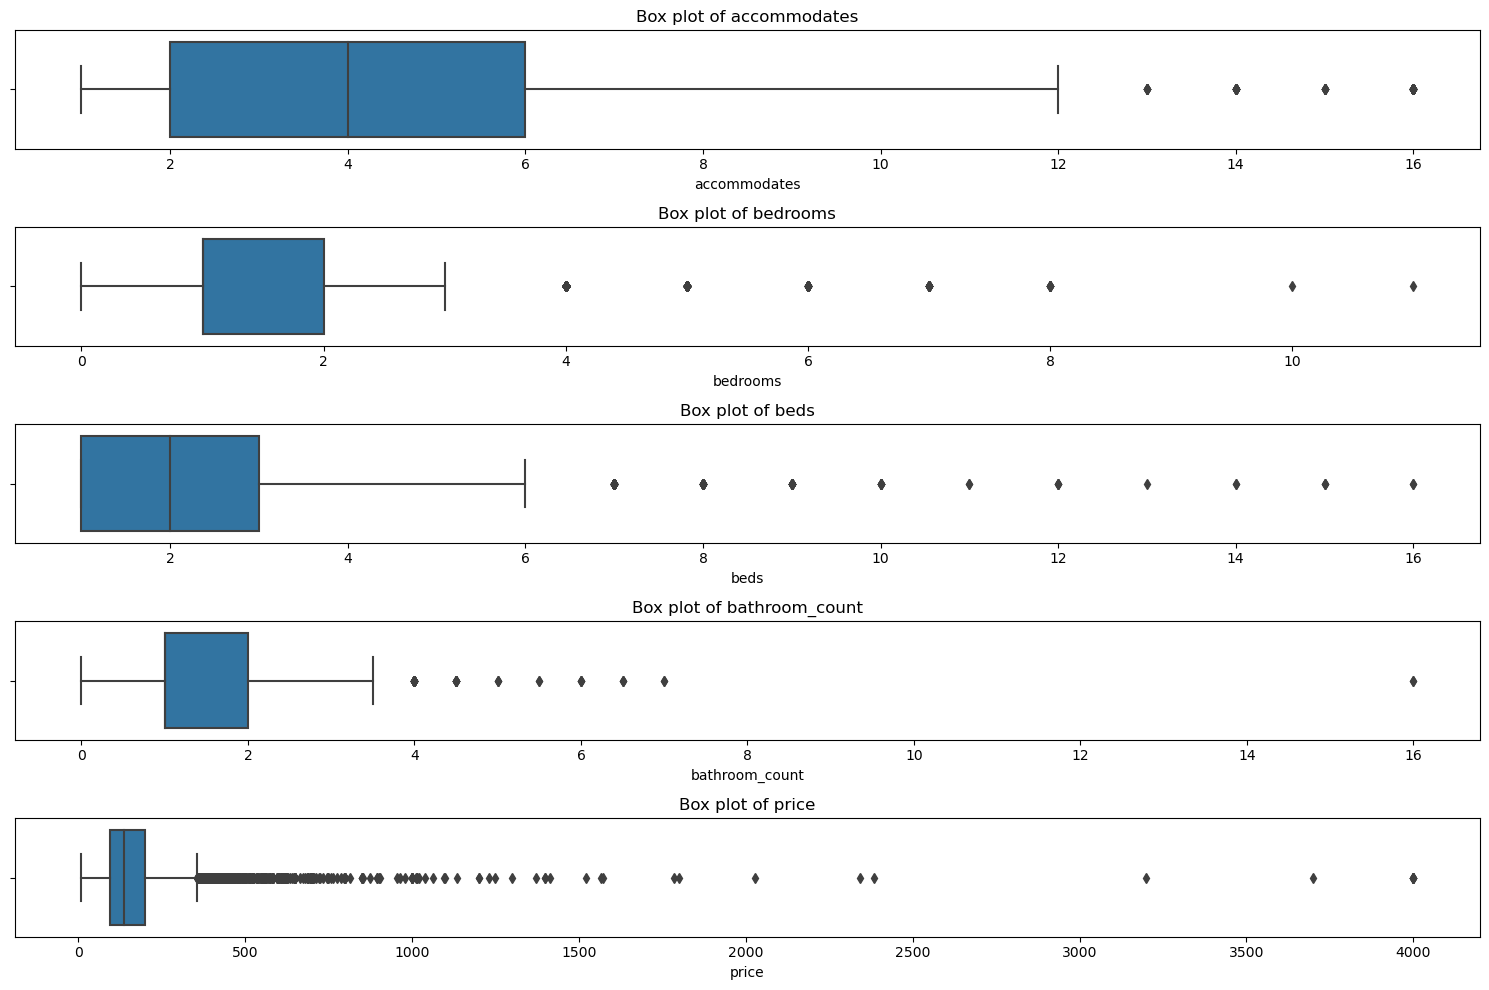

In [23]:
columns_to_plot = ['accommodates', 'bedrooms', 'beds', 'bathroom_count', 'price']

plt.figure(figsize=(15, 10))

for i, column in enumerate(columns_to_plot):
    plt.subplot(len(columns_to_plot), 1, i + 1) 
    sns.boxplot(x=df[column])
    plt.title(f'Box plot of {column}')

plt.tight_layout()
plt.show()

In [24]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers_IQR = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)].index
df_no_outlier_IQR = df.drop(outliers_IQR)

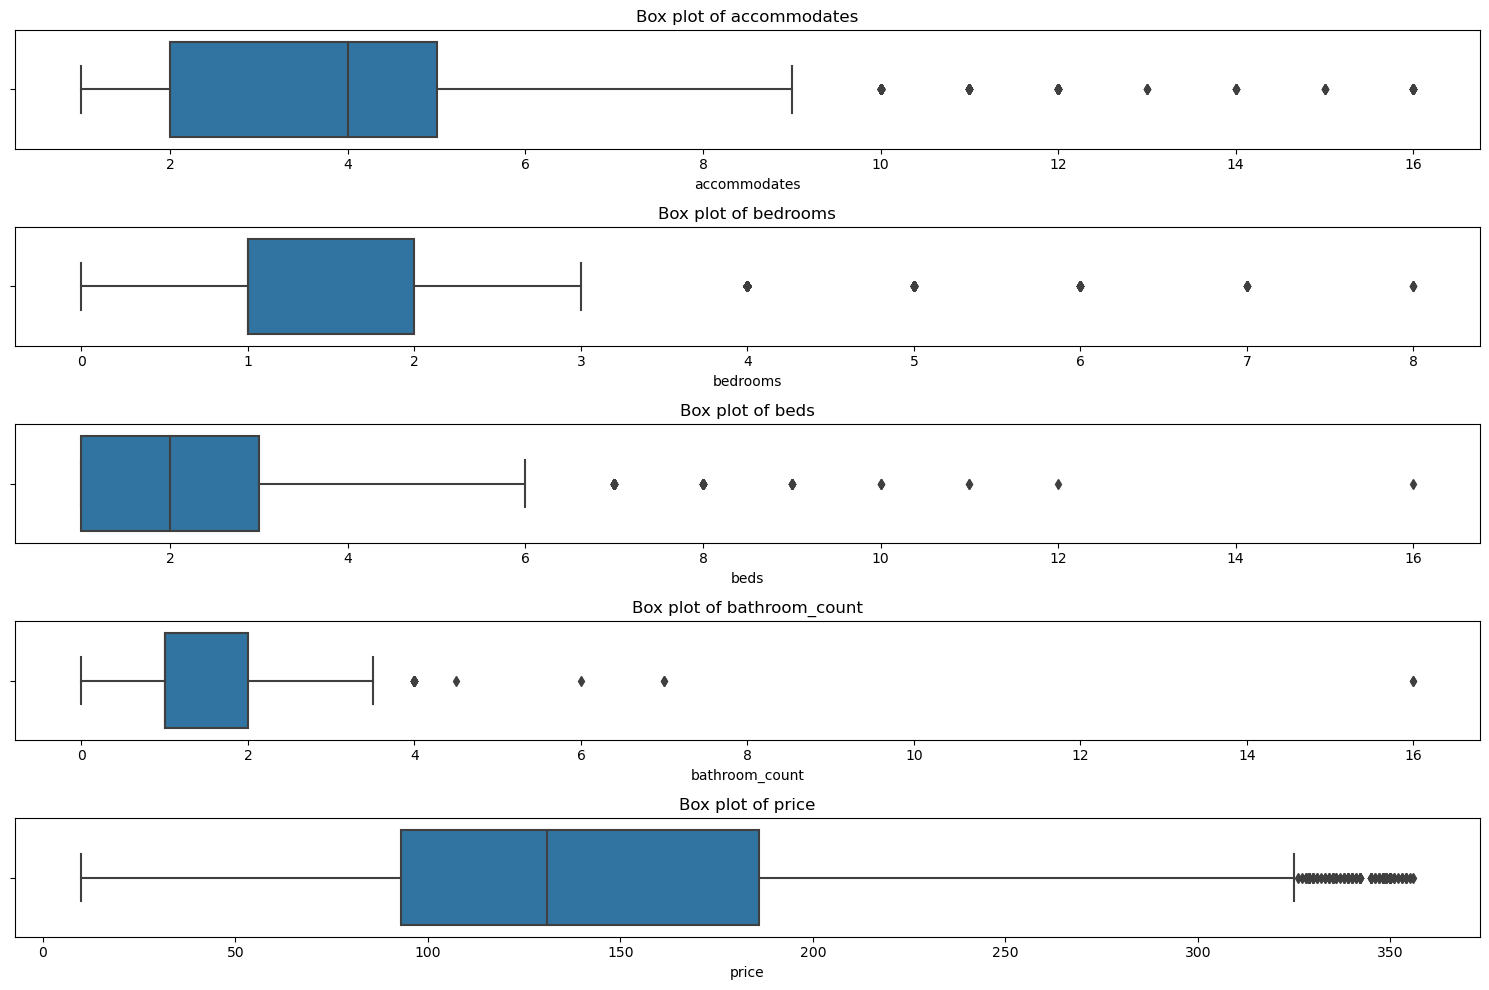

In [25]:
plt.figure(figsize=(15, 10))

for i, column in enumerate(columns_to_plot):
    plt.subplot(len(columns_to_plot), 1, i + 1) 
    sns.boxplot(x=df_no_outlier_IQR[column])
    plt.title(f'Box plot of {column}')

plt.tight_layout()
plt.show()

In [26]:
df_z = df
df_z['z_score'] = zscore(df['price'])
z_score_threshold = 3
outliers_z = df_z[abs(df_z['z_score']) > z_score_threshold].index
df_no_outlier_z = df_z.drop(outliers_z)
df_z = df_no_outlier_z.drop(columns=['z_score'])

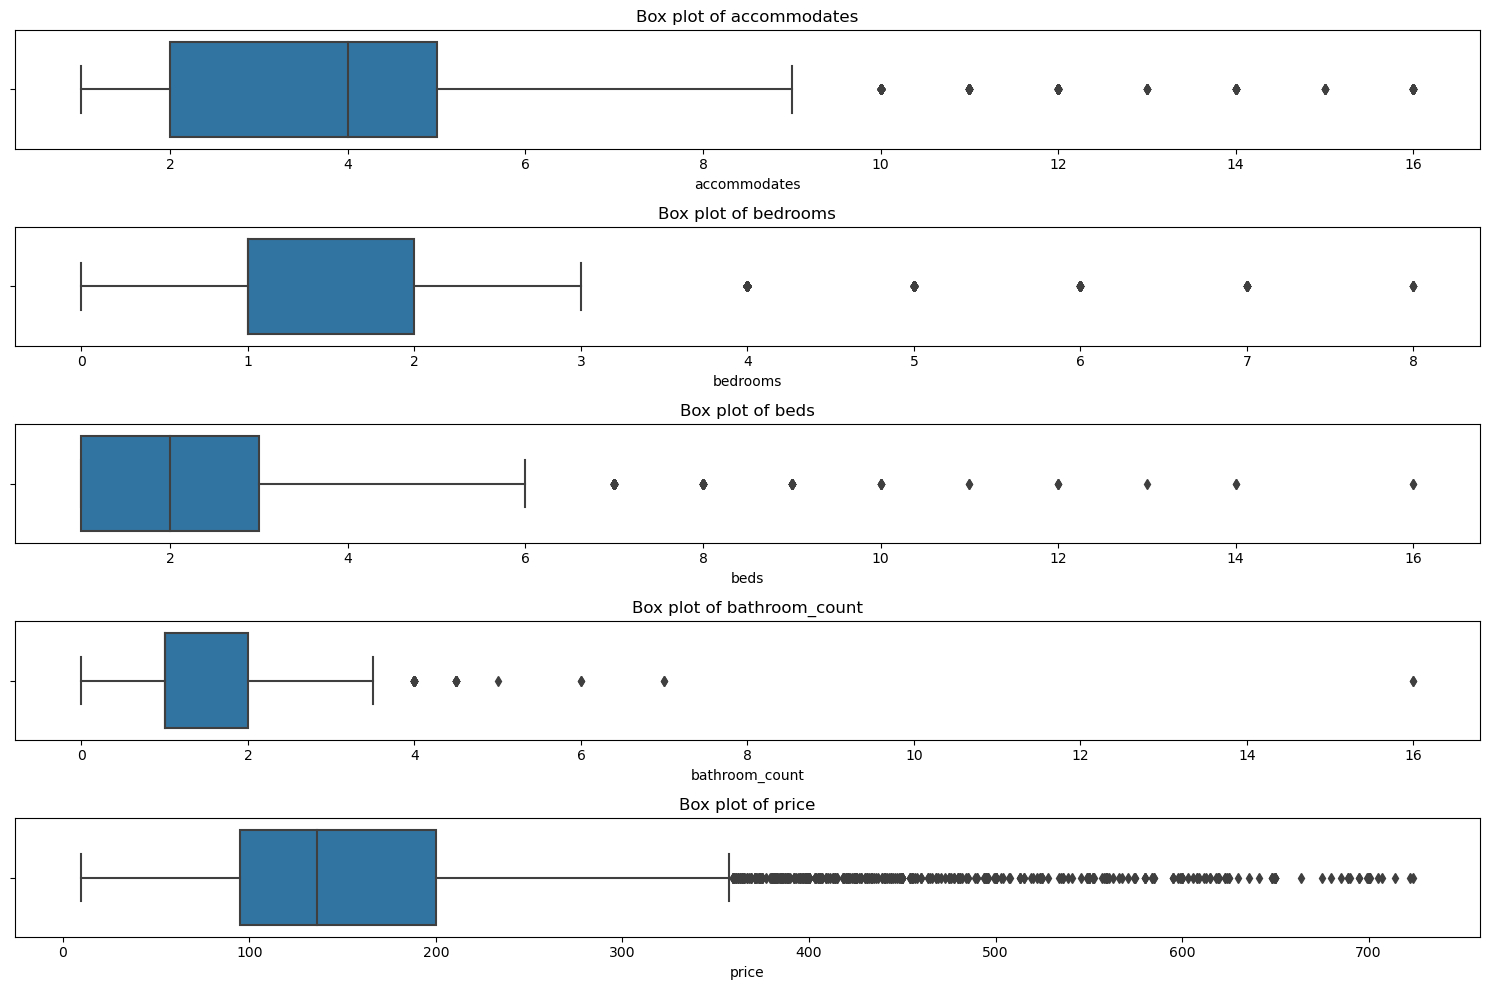

In [27]:
plt.figure(figsize=(15, 10))

for i, column in enumerate(columns_to_plot):
    plt.subplot(len(columns_to_plot), 1, i + 1) 
    sns.boxplot(x=df_z[column])
    plt.title(f'Box plot of {column}')

plt.tight_layout()
plt.show()

When the data is skewed to the right (positively skewed), it means that there are a number of exceptionally high values. the IQR method might not be the best choice to identify outliers because it could eliminate many data points that are naturally occurring in the distribution's tail. This is because IQR is more sensitive to skewness and might consider many of these data points as outliers. in practice, Z-score can sometimes handle skewed data better than IQR since it takes into account the mean and standard deviation, which are influenced by skewness.

# 2 Prediction model for price with all columns

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_log_error, r2_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.feature_selection import mutual_info_regression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

## 2.1 Additional process data

In [29]:
# Convert categorical data into boolean and remove unnecessary data
df_encoded = df_z.copy()

categorical_columns = ['neighbourhood_cleansed', 'property_type', 'bathroom_type','room_type']

for column in categorical_columns:
    dummies = pd.get_dummies(df_encoded[column], prefix=column)
    df_encoded = pd.concat([df_encoded, dummies], axis=1)

df_encoded = df_encoded.drop(columns=categorical_columns)

df_encoded.head()

,price,accommodates,bedrooms,beds,bathroom_count,Total crime,neighbourhood_cleansed_Alki,neighbourhood_cleansed_Arbor Heights,neighbourhood_cleansed_Atlantic,neighbourhood_cleansed_Belltown,neighbourhood_cleansed_Bitter Lake,neighbourhood_cleansed_Briarcliff,neighbourhood_cleansed_Brighton,neighbourhood_cleansed_Broadview,neighbourhood_cleansed_Broadway,neighbourhood_cleansed_Bryant,neighbourhood_cleansed_Cedar Park,neighbourhood_cleansed_Central Business District,neighbourhood_cleansed_Columbia City,neighbourhood_cleansed_Crown Hill,neighbourhood_cleansed_Dunlap,neighbourhood_cleansed_East Queen Anne,neighbourhood_cleansed_Eastlake,neighbourhood_cleansed_Fairmount Park,neighbourhood_cleansed_Fauntleroy,neighbourhood_cleansed_First Hill,neighbourhood_cleansed_Fremont,neighbourhood_cleansed_Gatewood,neighbourhood_cleansed_Genesee,neighbourhood_cleansed_Georgetown,neighbourhood_cleansed_Green Lake,neighbourhood_cleansed_Greenwood,neighbourhood_cleansed_Haller Lake,neighbourhood_cleansed_Harbor Island,neighbourhood_cleansed_Harrison/Denny-Blaine,neighbourhood_cleansed_High Point,neighbourhood_cleansed_Highland Park,neighbourhood_cleansed_Holly Park,neighbourhood_cleansed_Industrial District,neighbourhood_cleansed_Interbay,neighbourhood_cleansed_International District,neighbourhood_cleansed_Laurelhurst,neighbourhood_cleansed_Lawton Park,neighbourhood_cleansed_Leschi,neighbourhood_cleansed_Lower Queen Anne,neighbourhood_cleansed_Loyal Heights,neighbourhood_cleansed_Madison Park,neighbourhood_cleansed_Madrona,neighbourhood_cleansed_Mann,neighbourhood_cleansed_Maple Leaf,neighbourhood_cleansed_Matthews Beach,neighbourhood_cleansed_Meadowbrook,neighbourhood_cleansed_Mid-Beacon Hill,neighbourhood_cleansed_Minor,neighbourhood_cleansed_Montlake,neighbourhood_cleansed_Mount Baker,neighbourhood_cleansed_North Admiral,neighbourhood_cleansed_North Beach/Blue Ridge,neighbourhood_cleansed_North Beacon Hill,neighbourhood_cleansed_North Delridge,neighbourhood_cleansed_North Queen Anne,neighbourhood_cleansed_Olympic Hills,neighbourhood_cleansed_Phinney Ridge,neighbourhood_cleansed_Pike-Market,neighbourhood_cleansed_Pinehurst,neighbourhood_cleansed_Pioneer Square,neighbourhood_cleansed_Portage Bay,neighbourhood_cleansed_Rainier Beach,neighbourhood_cleansed_Rainier View,neighbourhood_cleansed_Ravenna,neighbourhood_cleansed_Riverview,neighbourhood_cleansed_Roosevelt,neighbourhood_cleansed_Roxhill,neighbourhood_cleansed_Seaview,neighbourhood_cleansed_Seward Park,neighbourhood_cleansed_South Beacon Hill,neighbourhood_cleansed_South Delridge,neighbourhood_cleansed_South Lake Union,neighbourhood_cleansed_South Park,neighbourhood_cleansed_Southeast Magnolia,neighbourhood_cleansed_Stevens,neighbourhood_cleansed_Sunset Hill,neighbourhood_cleansed_University District,neighbourhood_cleansed_Victory Heights,neighbourhood_cleansed_View Ridge,neighbourhood_cleansed_Wallingford,neighbourhood_cleansed_Wedgwood,neighbourhood_cleansed_West Queen Anne,neighbourhood_cleansed_West Woodland,neighbourhood_cleansed_Westlake,neighbourhood_cleansed_Whittier Heights,neighbourhood_cleansed_Windermere,neighbourhood_cleansed_Yesler Terrace,property_type_Barn,property_type_Boat,property_type_Bus,property_type_Camper/RV,property_type_Casa particular,property_type_Entire bungalow,property_type_Entire cabin,property_type_Entire condo,property_type_Entire cottage,property_type_Entire guest suite,property_type_Entire guesthouse,property_type_Entire home,property_type_Entire loft,property_type_Entire place,property_type_Entire rental unit,property_type_Entire serviced apartment,property_type_Entire townhouse,property_type_Entire vacation home,property_type_Entire villa,property_type_Farm stay,property_type_Houseboat,property_type_Private room,property_type_Private room in bed and breakfast,property_type_Private room in boat,property_type_Private room in bungalow,property_type_Private room in casa particular,property_type_Private room in condo,property_type_Private room in cottage,pro

In [30]:
# split trainning and testing data
X = df_encoded.drop('price', axis=1)  
y = df_encoded['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

## 2.2 Models and Evaluation

In [31]:
X = df_encoded.drop('price', axis=1)
y = df_encoded['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42)
}

metrics = {
    "Model": [],
    "RMSE": [],
    "MAE": [],
    "R2": []
}

for name, model in models.items():
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    metrics["Model"].append(name)
    metrics["RMSE"].append(rmse)
    metrics["MAE"].append(mae)
    metrics["R2"].append(r2)
    
stat_df_all_columns = pd.DataFrame(metrics)
stat_df_all_columns

,Model,RMSE,MAE,R2
0,Linear Regression,68.688701,46.481987,0.533314
1,Random Forest,70.293242,44.894848,0.511256
2,Gradient Boosting,68.072180,45.279054,0.541654


# 3 impove model

## 3.1 optimal Multiple Linear Regression (MLR)

### 3.1.1 Mutual Information (MI) scores for columns

In [32]:
X = df_encoded.drop(columns=['price'])
y = df_encoded['price']
mi_scores = mutual_info_regression(X, y)
mi_scores_series = pd.Series(mi_scores, index=X.columns, name="MI Scores")
mi_scores_series = mi_scores_series.sort_values(ascending=False)
mi_scores_series

accommodates                                        0.324321
bedrooms                                            0.276990
beds                                                0.229947
bathroom_count                                      0.212168
room_type_Private room                              0.180352
room_type_Entire home/apt                           0.176104
Total crime                                         0.140859
property_type_Private room in home                  0.135223
bathroom_type_standard                              0.126034
bathroom_type_shared                                0.092474
property_type_Entire home                           0.091064
property_type_Entire rental unit                    0.040695
property_type_Entire townhouse                      0.035827
property_type_Entire guest suite                    0.018986
bathroom_type_private                               0.017978
neighbourhood_cleansed_Roosevelt                    0.015324
neighbourhood_cleansed_H

### 3.1.2 MLR with selected columns

In [33]:
X = df_encoded.drop('price', axis=1)  
y = df_encoded['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
model = LinearRegression()

model.fit(X_train, y_train)
y_pred_before = model.predict(X_test)
rmse_before = mean_squared_error(y_test, y_pred_before, squared=False)
mae_before = mean_absolute_error(y_test, y_pred_before)
r2_before = r2_score(y_test, y_pred_before)

X_optimized = df_encoded[['bedrooms', 'accommodates', 'beds', 'bathroom_count', 'room_type_Entire home/apt',
                          'room_type_Private room', 'property_type_Private room in home', 'bathroom_type_standard',
                          'property_type_Private room in home', 'bathroom_type_shared','Total crime']]
y_optimized = df_encoded['price']
X_train_opt, X_test_opt, y_train_opt, y_test_opt = train_test_split(X_optimized, y_optimized, test_size=0.30, random_state=42)

model.fit(X_train_opt, y_train_opt)
y_pred_after = model.predict(X_test_opt)
rmse_after = mean_squared_error(y_test_opt, y_pred_after, squared=False)
mae_after = mean_absolute_error(y_test_opt, y_pred_after)
r2_after = r2_score(y_test_opt, y_pred_after)

results = pd.DataFrame({
    'Model': ['MLR Before Optimization', 'MLR After Optimization'],
    'RMSE': [rmse_before, rmse_after],
    'MAE': [mae_before, mae_after],
    'R2': [r2_before, r2_after]
})

results

,Model,RMSE,MAE,R2
0,MLR Before Optimization,68.688701,46.481987,0.533314
1,MLR After Optimization,73.185889,49.468502,0.470204


## 3.2 Optimal (Ramdom Forest) RF

### 3.2.1 Find optimal RF by using random search (run might take long time)

In [34]:
# split trainning and testing data
X = df_encoded.drop('price', axis=1)  
y = df_encoded['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

rf_model = RandomForestRegressor(random_state=42)

param_distributions = {
    'n_estimators': randint(100, 500),
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': randint(2, 20)
}

random_search = RandomizedSearchCV(estimator=rf_model, param_distributions=param_distributions, n_iter=10, cv=5, scoring='neg_mean_squared_error', verbose=1, random_state=42)
random_search.fit(X_train, y_train)

y_pred_random = random_search.best_estimator_.predict(X_test)

rmse_random = mean_squared_error(y_test, y_pred_random, squared=False)
mae_random = mean_absolute_error(y_test, y_pred_random)
r2_random = r2_score(y_test, y_pred_random)

print("Random Search Evaluation Metrics:")
print("RMSE:", rmse_random)
print("MAE:", mae_random)
print("R-squared:", r2_random)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Random Search Evaluation Metrics:
RMSE: 68.72959052576944
MAE: 45.34864180618583
R-squared: 0.5327583825577196


In [35]:
#get the trained model into file for further prediction
best_params_grid_rs = random_search.best_estimator_
print("Best parameters:", best_params_grid_rs)

joblib.dump(best_params_grid_rs , 'best_rf_params_rs.joblib')

Best parameters: RandomForestRegressor(max_depth=10, min_samples_split=13, n_estimators=444,
                      random_state=42)


['best_rf_params_rs.joblib']

### 3.2.2 Upload the optimal RF model we have trained above to predict

In [36]:
X = df_encoded.drop('price', axis=1)  
y = df_encoded['price']

rf_model_before = RandomForestRegressor(random_state=42)

rf_model_before.fit(X_train, y_train)

y_pred_before = rf_model_before.predict(X_test)

rmse_before = mean_squared_error(y_test, y_pred_before, squared=False)
mae_before = mean_absolute_error(y_test, y_pred_before)
r2_before = r2_score(y_test, y_pred_before)

optimized_rf_model = joblib.load('best_rf_params_rs.joblib')

y_pred_optimized = optimized_rf_model.predict(X_test)

rmse_optimized = mean_squared_error(y_test, y_pred_optimized, squared=False)
mae_optimized = mean_absolute_error(y_test, y_pred_optimized)
r2_optimized = r2_score(y_test, y_pred_optimized)

results = pd.DataFrame({
    'Model': ['Random Forest Before Optimization', 'Random Forest After Optimization'],
    'RMSE': [rmse_before, rmse_optimized],
    'MAE': [mae_before, mae_optimized],
    'R2': [r2_before, r2_optimized]
})

results

,Model,RMSE,MAE,R2
0,Random Forest Before Optimization,70.293242,44.894848,0.511256
1,Random Forest After Optimization,68.729591,45.348642,0.532758


## 3.3 Optimal Gradient Boosting (GB) model

### 3.3.1 Find optimal GP by using random search (run might take long time)

In [37]:
X = df_encoded.drop('price', axis=1)  
y = df_encoded['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

gb_model = GradientBoostingRegressor(random_state=42)

param_distributions = {
    'n_estimators': randint(100, 500),
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': randint(3, 10),
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 5)
}

random_search = RandomizedSearchCV(estimator=gb_model, param_distributions=param_distributions, n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42, verbose=1)
random_search.fit(X_train, y_train)

best_gb_model = random_search.best_estimator_
y_pred_gb = best_gb_model.predict(X_test)
rmse_gb = mean_squared_error(y_test, y_pred_gb, squared=False)
mae_gb = mean_absolute_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print("Best parameters:", random_search.best_params_)
print("RMSE:", rmse_gb)
print("MAE:", mae_gb)
print("R-squared:", r2_gb)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters: {'learning_rate': 0.05, 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 8, 'n_estimators': 343}
RMSE: 67.45570192384585
MAE: 44.17779975923318
R-squared: 0.5499183186157073


In [38]:
#get the trained model into file for further prediction
best_params_grid_rs = random_search.best_estimator_
print("Best parameters:", best_params_grid_rs)

joblib.dump(best_params_grid_rs , 'best_gb_params_rs.joblib')

Best parameters: GradientBoostingRegressor(learning_rate=0.05, max_depth=5, min_samples_leaf=4,
                          min_samples_split=8, n_estimators=343,
                          random_state=42)


['best_gb_params_rs.joblib']

### 3.3.2 Upload the optimal GB model we have trained above to predict

In [39]:
X = df_encoded.drop('price', axis=1)  
y = df_encoded['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

gb_model_before = GradientBoostingRegressor(random_state=42)

gb_model_before.fit(X_train, y_train)

y_pred_before = gb_model_before.predict(X_test)

rmse_before = mean_squared_error(y_test, y_pred_before, squared=False)
mae_before = mean_absolute_error(y_test, y_pred_before)
r2_before = r2_score(y_test, y_pred_before)

optimized_gb_model = joblib.load('best_gb_params_rs.joblib')

y_pred_optimized = optimized_gb_model.predict(X_test)

rmse_optimized = mean_squared_error(y_test, y_pred_optimized, squared=False)
mae_optimized = mean_absolute_error(y_test, y_pred_optimized)
r2_optimized = r2_score(y_test, y_pred_optimized)

results = pd.DataFrame({
    'Model': ['Gradient Boosting Before Optimization', 'Gradient Boosting After Optimization'],
    'RMSE': [rmse_before, rmse_optimized],
    'MAE': [mae_before, mae_optimized],
    'R2': [r2_before, r2_optimized]
})

results

,Model,RMSE,MAE,R2
0,Gradient Boosting Before Optimization,68.072180,45.279054,0.541654
1,Gradient Boosting After Optimization,67.455702,44.177800,0.549918


# 4 Model selection and futher improve

## 4.1 Stacking model with optimal RF and optimal gb

In [40]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
import joblib

In [41]:
X = df_encoded.drop('price', axis=1)  
y = df_encoded['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

optimized_rf_model = joblib.load('best_rf_params_rs.joblib')
optimized_gb_model = joblib.load('best_gb_params_rs.joblib')

mlr_model = LinearRegression()
mlr_model.fit(X_train, y_train)

base_models = [
    ('optimized_rf', optimized_rf_model),
    ('optimized_gb', optimized_gb_model),
    ('mlr', mlr_model)
]

meta_model = Ridge()

stacked_model = StackingRegressor(estimators=base_models, final_estimator=meta_model, cv=5)

stacked_model.fit(X_train, y_train)

y_pred_stack = stacked_model.predict(X_test)

rmse_stack = mean_squared_error(y_test, y_pred_stack, squared=False)
mae_stack = mean_absolute_error(y_test, y_pred_stack)
r2_stack = r2_score(y_test, y_pred_stack)

print("Stacking Model Evaluation Metrics:")
print("RMSE:", rmse_stack)
print("MAE:", mae_stack)
print("R-squared:", r2_stack)

Stacking Model Evaluation Metrics:
RMSE: 66.60939096247503
MAE: 44.08754047692551
R-squared: 0.5611410788578073


In [42]:
import joblib
joblib.dump(stacked_model, 'stacked_model.joblib')

['stacked_model.joblib']

In [43]:
X = df_encoded.drop('price', axis=1)  
y = df_encoded['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

loaded_model = joblib.load('stacked_model.joblib')

y_pred = loaded_model.predict(X_test)

rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Evaluation Metrics:")
print("RMSE:", rmse)
print("MAE:", mae)
print("R-squared:", r2)


Evaluation Metrics:
RMSE: 66.60939096247503
MAE: 44.08754047692551
R-squared: 0.5611410788578073


## 4.2 Improve the stacking model by using bagging (might run for a long time)

In [44]:
from sklearn.ensemble import BaggingRegressor

In [45]:
X = df_encoded.drop('price', axis=1)  
y = df_encoded['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

bagging_stacked_model = BaggingRegressor(estimator=stacked_model, n_estimators=10, random_state=42)

bagging_stacked_model.fit(X_train, y_train)

y_pred_bag_stack = bagging_stacked_model.predict(X_test)

rmse_bag_stack = mean_squared_error(y_test, y_pred_bag_stack, squared=False)
mae_bag_stack = mean_absolute_error(y_test, y_pred_bag_stack)
r2_bag_stack = r2_score(y_test, y_pred_bag_stack)

print("Bagging Stacked Model Evaluation Metrics:")
print("RMSE:", rmse_bag_stack)
print("MAE:", mae_bag_stack)
print("R-squared:", r2_bag_stack)


In [ ]:
import joblib

joblib.dump(bagging_stacked_model, 'bagging_stacked_model.joblib')

['bagging_stacked_model.joblib']

## 4.3 Using the model from above to predict by importing model file.

In [ ]:
X = df_encoded.drop('price', axis=1)  
y = df_encoded['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

loaded_model = joblib.load('bagging_stacked_model.joblib')

y_pred = loaded_model.predict(X_test)

rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Evaluation Metrics:")
print("RMSE:", rmse)
print("MAE:", mae)
print("R-squared:", r2)


Evaluation Metrics:
RMSE: 66.38752719905041
MAE: 44.00577740079706
R-squared: 0.5640597284581361
